<a href="https://colab.research.google.com/github/Ravitejasabbu/sabburaviteja/blob/main/week-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # Part 1 â€“ Import the required Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Load the classified dataset into a dataframe using pandas
# Replace 'classified_manufacturing_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/content/Classified_Data.txt')

# 2. Check the data types of each feature(column) in the dataset
data_types = df.dtypes
print("Data Types of each feature:\n", data_types)

# 3. Generate a summary of the dataset for min, max, stddev, quartile values
summary = df.describe(percentiles=[.25, .5, .75, .9])
print("\nSummary of the dataset:\n", summary)

# 4. List the names of columns/features in the dataset
columns = df.columns.tolist()
print("\nColumns/Features in the dataset:\n", columns)

# 5. Scale the features using StandardScaler and transform the data
# Assuming that the target variable is the last column, adjust accordingly if needed
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optionally, convert back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled Features:\n", X_scaled_df.head())


Data Types of each feature:
 Unnamed: 0        int64
WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object

Summary of the dataset:
         Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
90%     899.100000     1.336612     1.441901     1.

part-2

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN model has been fitted to the training data.")

Training set size: 800
Testing set size: 200
KNN model has been fitted to the training data.


part-3

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


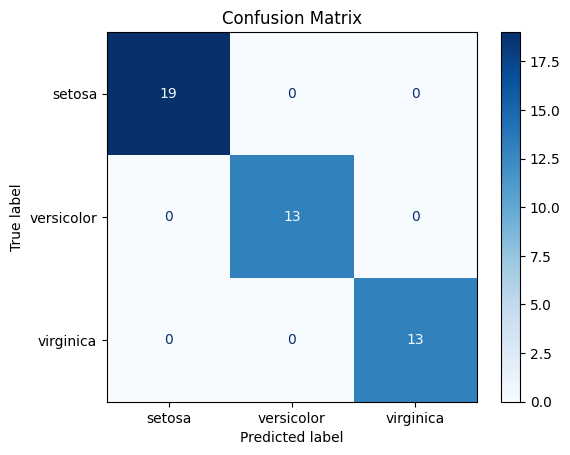

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load a sample dataset (Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# 1. Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 2. Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:")
print(class_report)
